In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from utils.evaluator import Evaluator

peak_detector = Evaluator()

In [2]:
### Select database
# test_database = 'MIT_BIH'
# test_database = 'INCART'
# test_database = 'QTDB'
test_database = 'MIT_BIH_ST'
# test_database = 'European_ST_T'
# test_database = 'TELE'

'''
The current model was developed by training MIT_BIH, INCART, and QT databases.
If you test these databases, you will see the performance in the training set.
Cross-database testing is available when you test MIT_BIH_ST, European_ST_T, and TELE databases.
'''

In [3]:
### Run peak detection pipeline
print('Database ... {0}'.format(test_database))
start = time.time()
peak_detector.load(test_database)
peak_detector.find_peaks()
end = time.time()
elapsed = end-start
average_cost = elapsed/len(peak_detector.db_loading.metadata_patient)
print('Average elapsed time : {0:.2f}'.format(average_cost))

Database ... MIT_BIH_ST
... Processing  1 / 28
... Processing  2 / 28
... Processing  3 / 28
... Processing  4 / 28
... Processing  5 / 28
... Processing  6 / 28
... Processing  7 / 28
... Processing  8 / 28
... Processing  9 / 28
... Processing  10 / 28
... Processing  11 / 28
... Processing  12 / 28
... Processing  13 / 28
... Processing  14 / 28
... Processing  15 / 28
... Processing  16 / 28
... Processing  17 / 28
... Processing  18 / 28
... Processing  19 / 28
... Processing  20 / 28
... Processing  21 / 28
... Processing  22 / 28
... Processing  23 / 28
... Processing  24 / 28
... Processing  25 / 28
... Processing  26 / 28
... Processing  27 / 28
... Processing  28 / 28
... Predicting  1 / 28
... Predicting  2 / 28
... Predicting  3 / 28
... Predicting  4 / 28
... Predicting  5 / 28
... Predicting  6 / 28
... Predicting  7 / 28
... Predicting  8 / 28
... Predicting  9 / 28
... Predicting  10 / 28
... Predicting  11 / 28
... Predicting  12 / 28
... Predicting  13 / 28
... Predic

In [4]:
### Summary of model performance
table_summary = peak_detector.report_all()
table_summary.loc[table_summary.shape[0],:] = peak_detector.report_summary()
table_summary.index = peak_detector.db_loading.metadata_patient + ['Total']
table_summary = table_summary.round(decimals=4)

print('Summary of model performance')
print(table_summary)

Summary of model performance
            TP    FP    FN  sensitivity     PPV      F1
300     2558.0   0.0   0.0       1.0000  1.0000  1.0000
301     2497.0   2.0   0.0       1.0000  0.9992  0.9996
302     2113.0   4.0   0.0       1.0000  0.9981  0.9991
303     3005.0   0.0   0.0       1.0000  1.0000  1.0000
304     1852.0   0.0   0.0       1.0000  1.0000  1.0000
305     1018.0   7.0  18.0       0.9826  0.9932  0.9879
306     6527.0   0.0   0.0       1.0000  1.0000  1.0000
307     2468.0   6.0   1.0       0.9996  0.9976  0.9986
308     2298.0   3.0   1.0       0.9996  0.9987  0.9991
309     5149.0   1.0   0.0       1.0000  0.9998  0.9999
310     2410.0   0.0   0.0       1.0000  1.0000  1.0000
311     3009.0   1.0   0.0       1.0000  0.9997  0.9998
312     2333.0   0.0   7.0       0.9970  1.0000  0.9985
313     2700.0   0.0   1.0       0.9996  1.0000  0.9998
314     2121.0   2.0   0.0       1.0000  0.9991  0.9995
315     3270.0   0.0   4.0       0.9988  1.0000  0.9994
316     3351.0   0.

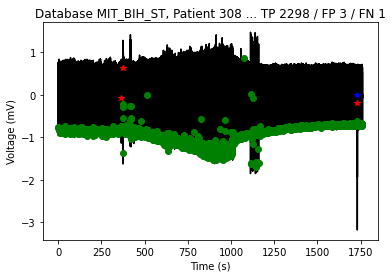

In [5]:
### Visualize a specific ECGs
t_idx = 8
t_patient = table_summary.index[t_idx]
t_ecg = peak_detector.set_dict['ecg'][t_idx]
t_label = peak_detector.set_dict['label'][t_idx]
t_pred_TP = peak_detector.set_dict['pred_TP'][t_idx]
t_pred_FP = peak_detector.set_dict['pred_FP'][t_idx]
t_pred_FN = peak_detector.set_dict['pred_FN'][t_idx]
t_xtick = np.arange(t_ecg.shape[0])/360

plt.plot(t_xtick, t_ecg, color='black')
plt.plot(t_xtick[t_pred_TP], [t_ecg[x] for x in t_pred_TP], 'o', color='green')
plt.plot(t_xtick[t_pred_FP], [t_ecg[x] for x in t_pred_FP], '*', color='red')
plt.plot(t_xtick[t_pred_FN], [t_ecg[x] for x in t_pred_FN], '*', color='blue')
plt.title('Database {}, Patient {} ... TP {} / FP {} / FN {}'.format(test_database, t_patient, len(t_pred_TP), len(t_pred_FP), len(t_pred_FN)))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.show()